### Concrete compression Strength analysis

Given a dataset on cement compression strength, let us try to find what factors we should focus on

#### Modules

In [26]:
import numpy as np  
import pandas as pd #for data manipulation
import matplotlib.pyplot as plt #need matplot and seaborn for visualisation
import seaborn as sns

"""
Most of functions are defined in helper files under their specific use
cases

Use of every user-defined function is displayed with the use of "Help"


"""

from Class_files.utils import read_data,split_data
from Class_files.report import save_results
from Class_files.analyze import train_on_models,DataHandling
from Class_files.plot import Boxplot,pairplot,Violinplot
import warnings
warnings.filterwarnings("ignore")

### Read initial dataset

In [2]:
help(read_data)

Help on function read_data in module Class_files.utils:

read_data(FileName)
    Reading dataset from local files such as csv, txt or xls
    
    Parameters:
    
    FileName: Path to the dataset or if file is in local directory,
              filename is enough
    
    Returns:
    
    A Pandas DataFrame with the dataset loaded in



In [3]:
df = read_data('Concrete_Data.xls') 

##### The Dataset

In [4]:
#gives us the number of rows and columns of a dataset

df.shape 

(1030, 9)

There are about 1030 rows of data with 9 different attributes, final attributes being the target - Compression strength

In [5]:
#gives us a peek of the dataset

df.head() 

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Renaming columns to make them easier to understand

In [6]:
#the new columns names

df.columns = ['cement','blast furnace','Fly ash','water','superplasticizer','coarse agg','fine agg','age','strength']

In [7]:
df.head()

,cement,blast furnace,Fly ash,water,superplasticizer,coarse agg,fine agg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


We use the pandas describe() to get some initial statistical viewpoints

In [8]:
df.describe()

,cement,blast furnace,Fly ash,water,superplasticizer,coarse agg,fine agg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Checking if any null values, if any found - we can remove them/fill them with mean values and proceed to the next step

In [9]:
#isna checks for null values, and sum gives the count of those values if they are present

df.isna().sum() 

cement              0
blast furnace       0
Fly ash             0
water               0
superplasticizer    0
coarse agg          0
fine agg            0
age                 0
strength            0
dtype: int64

No null values found, so the data is clean enough to proceed to some visualisations

### Visualisation

Finding distributions of data with help of visualization

In [10]:
help(Boxplot)

Help on function Boxplot in module Class_files.plot:

Boxplot(DataFrame, n)
    Draws a box plot to show distributions
    
    Parameters:
    
    DataFrame: A Pandas DataFrame
               Dataset for plotting
    
    n: Integer
       Max number of individual plots to be made in one row
    
    
    Returns: 
    
    Plots Individual box plots based on the number of 
    attributes of dataset



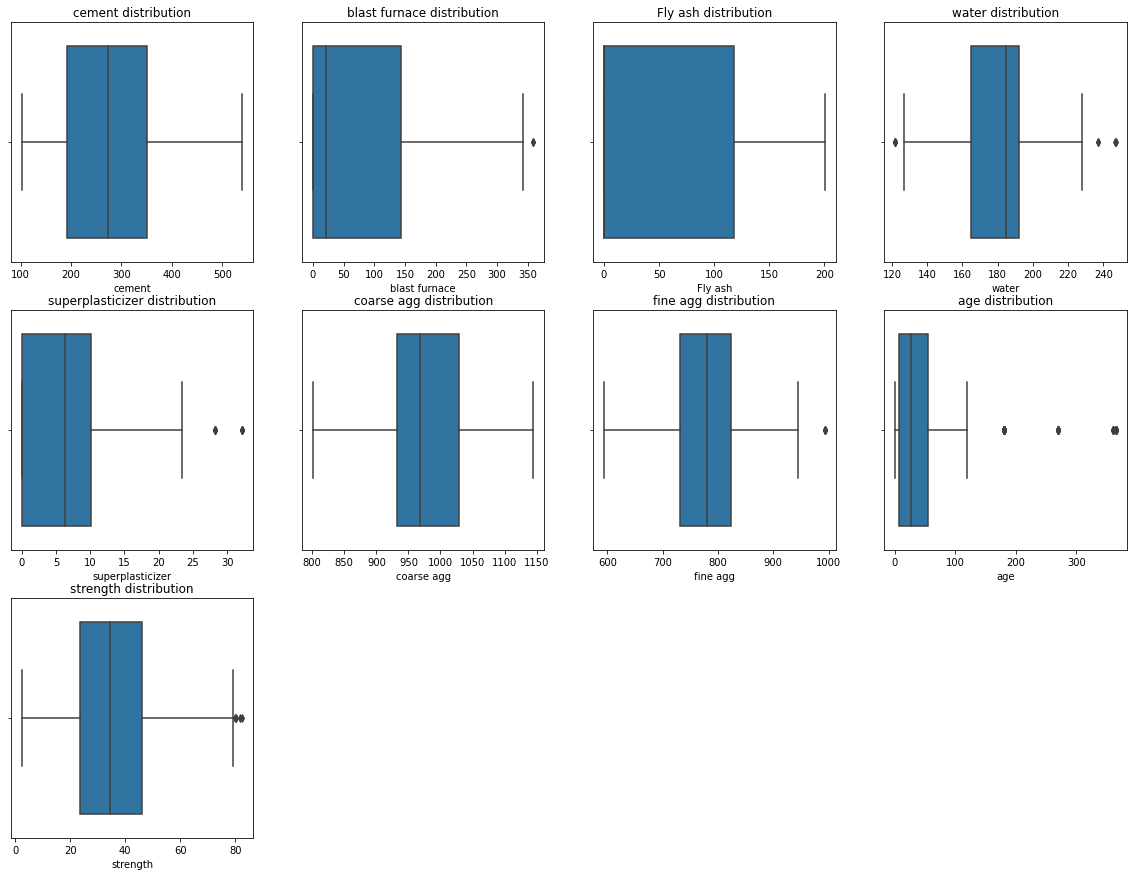

In [11]:
Boxplot(df,4)

In [28]:
help(Violinplot)

Help on function Violinplot in module Class_files.plot:

Violinplot(DataFrame, n)
    Draws a Violin plot to show distributions, an alternative
    to box plots
    
    Parameters:
    
    DataFrame: A Pandas DataFrame
               Dataset for plotting
    
    n: Integer
       Max number of individual plots to be made in one row
    
    
    Returns: 
    
    Plots Individual box plots based on the number of 
    attributes of dataset



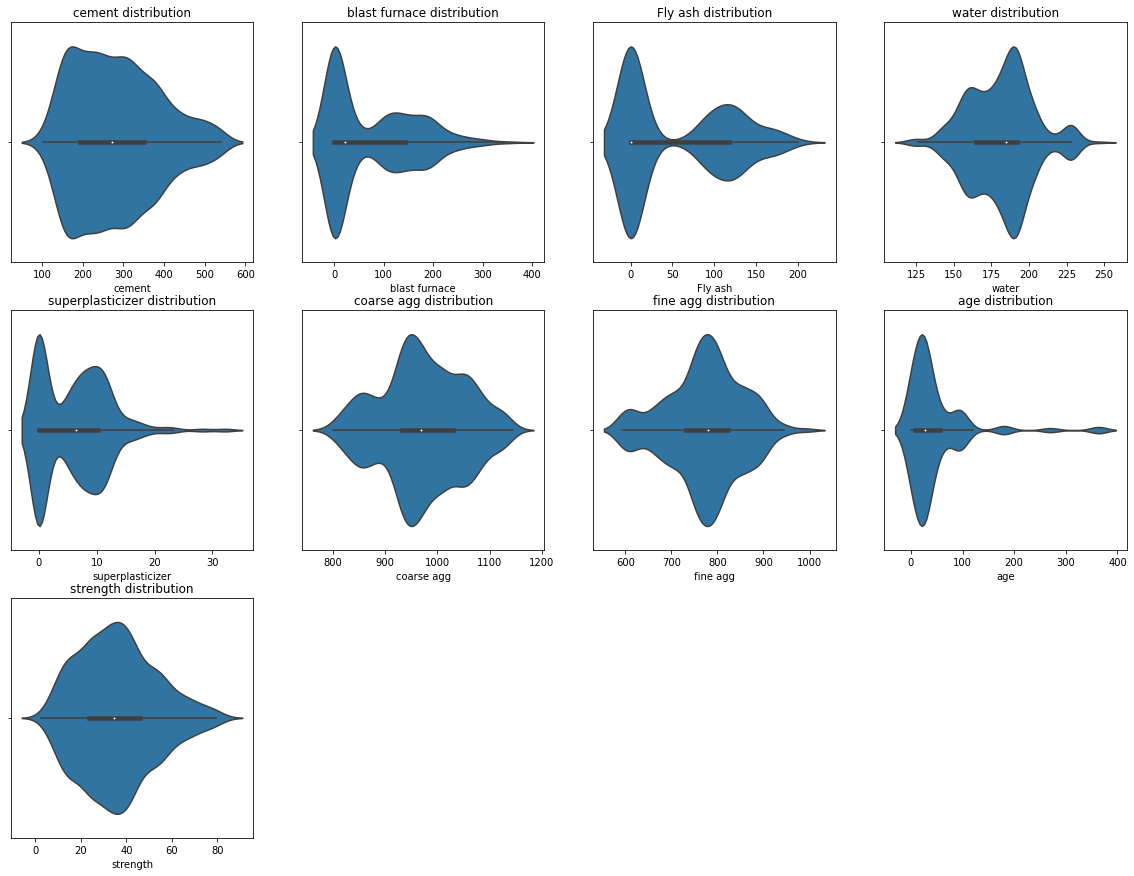

In [27]:
Violinplot(df,4)

Number of outliers present in the dataset

In [12]:
help(DataHandling().get_outliers)

obj created
Help on method get_outliers in module Class_files.analyze:

get_outliers() method of Class_files.analyze.DataHandling instance
    Used to find the number of outliers in a specific 
    dataset
    
    Parameters:
    DataFrame: Pandas DataFrame
               Dataset to be checked for outliers
    
    
    Returns:
    Result_df : A Pandas DataFrame
                DataFrame containing the Attributes of 
                the dataset along with the number of 
                outliers in each of them



In [13]:
my_df = DataHandling.get_outliers(df)
my_df

,Attributes,Number of outliers
0,cement,0
1,blast furnace,2
2,Fly ash,0
3,water,9
4,superplasticizer,10
5,coarse agg,0
6,fine agg,5
7,age,59
8,strength,4


Finding Correlation between attributes, basically how much two attributes are related

In [14]:
df.corr() #default is pearson correlation

,cement,blast furnace,Fly ash,water,superplasticizer,coarse agg,fine agg,age,strength
cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
blast furnace,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
coarse agg,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
fine agg,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


We see that cement, superplasticizer and age have the highest correlation with respect to strength

Superplasticizer is basically added to reduce the required water content, and add strength. Which is why its correlated with strength and negative related to water


We can also observe that for house constructions, the concrete is hydrated frequently for days to increase its strength. This is one of the reasons age is correlated with strength

### More plots

In [15]:
#sns.pairplot(df)

In [16]:
help(pairplot)

Help on function pairplot in module Class_files.plot:

pairplot(DataFrame, n)
    Draws a pairplot between two attributes, generally
    one dependent and one independent variable
    
    Parameters:
    
    DataFrame: A Pandas DataFrame
               Dataset for plotting
    
    n: Integer
       Max number of individual plots to be made in one row
    
    
    Returns: 
    
    Plots Individual pair plots based on the number of 
    attributes of dataset



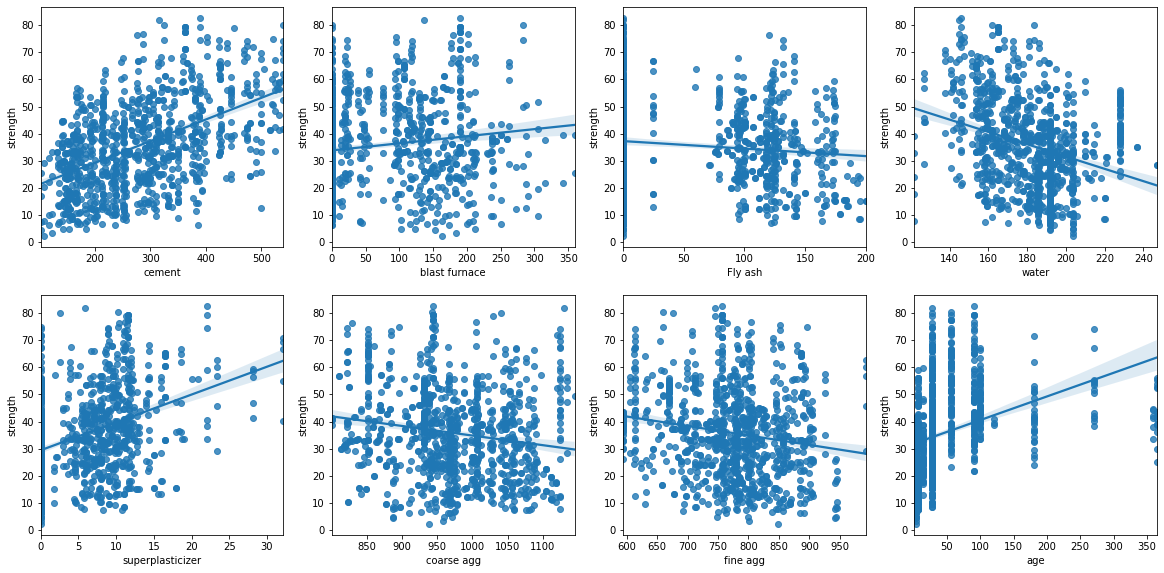

In [17]:
 pairplot(df,4)

#### Model building

In [18]:
help(split_data)

Help on function split_data in module Class_files.utils:

split_data(MyDataFrame, split=0.2)
    Splits Data in X_train, X_test,y_train,y_test
    
    Default is 80% training and 20% testing
    
    Parameters:
    MyDataFrame: Pandas DataFrame,
                 Assumes the last attribute is the target 
                 attribute and rest are independent attributes
    
    test_size : splitting value of data,
                default is set as 80:20 ratio
    
    
    Returns:
    X_train : List of all the training data
    
    X_test : List of all testing data
    
    y_train : Corresponding target values for training data
    
    y_test : Corresponding target values for testing data



In [19]:
"""
  Splitting dataset into test and train
  with 80% for train and 20% for test
"""

from Class_files.utils import split_data

X_train, X_test, y_train, y_test = split_data(df,0.5)

In [21]:
help(train_on_models)

Help on function train_on_models in module Class_files.analyze:

train_on_models(X_train, X_test, y_train, y_test)
    This is a user-defined function that trains 
    the following models with default parameters:
    
    1. Linear Regression
    2. Decision Tree regressor
    3. K neighbors regressor
    4. Support Vector Machine (RBF Kernel)
    5. Gradient Boosting
    
    Parameters:
    
    X_train, X_test, y_train, y_test:
    
    These are the split data on which model are to be
    trained and tested
    
    Returns:
    data: Pandas DataFrame
             A Dataframe containing model name, their scores and 
             respective metrics such as Mean-squared-error, 
             R2 score and Mean-Absolute-error



In [22]:
data = train_on_models(X_train,X_test,y_train,y_test)

Trained on  Linear Regression with default parameters
Trained on  Decision Trees    with default parameters
Trained on  KNN               with default parameters
Trained on  Support Vector Machine with default parameters
Trained on  Gradient Boosting      with default parameters


In [25]:
data

,Model Name,Score,MSE,R2 Score,MAE
0,Linear Regression,0.612117,109.199409,0.612117,8.483208
1,Decision Trees,0.779221,62.155208,0.779221,5.151046
2,KNN,0.644419,100.105523,0.644419,7.794944
3,Support Vector Machine,0.570958,120.786613,0.570958,8.796815
4,Gradient Boosting,0.893460,29.993943,0.893460,4.003528


In [23]:
help(save_results)

Help on function save_results in module Class_files.report:

save_results(df, name)
    Save the DataFrame to a text file
    
    Parameters:
    df: Pandas Dataframe,
        Data to be saved
    
    name: Name of file for the data
          be stored in
    Returns:
    Saves the data in the file in the 
    current working directory



In [24]:
save_results(data,'results.txt')

Results saved in results.txt file
